In [1]:
import pandas as pd

df = pd.read_csv("D:\Datasets1\VSCode files\Project Customer Segmentation Using Clustering Techniques\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
# Checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Encode categorical features (e.g., Gender):
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [5]:
# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

### EDA

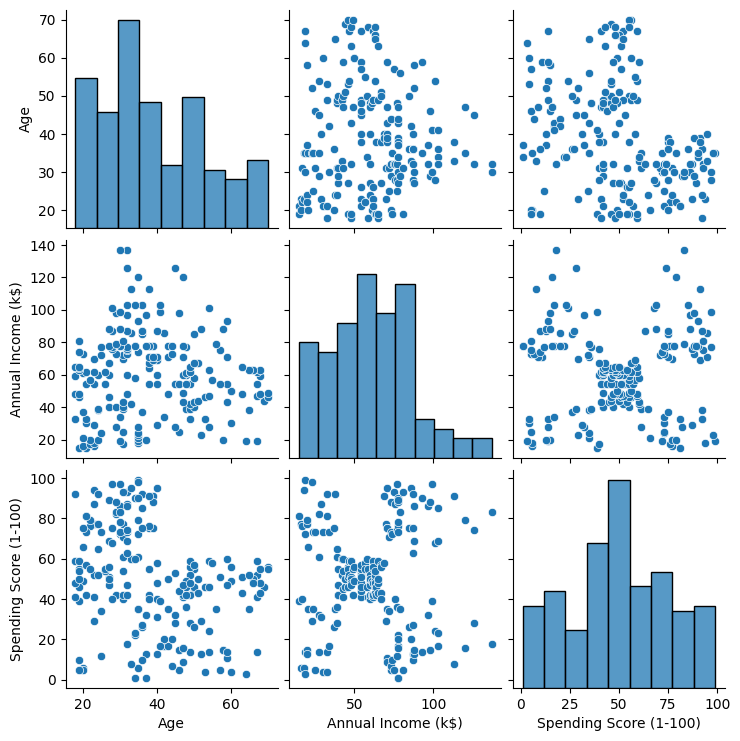

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

**Interpretation:**

***Histograms:***
- **Age:** Right-skewed: more younger people (20s–30s), fewer older.
- **Annual Income:** Fairly uniform, slight concentration around $60k–$80k.
- **Spending Score:** Bimodal — two peaks: low and high spenders, fewer in the middle.

**Takeaway:** There's a clear divide between low and high spenders, a sign that clustering will work well.

***Scatterplots:***

**Age vs Annual Income:**
- No strong correlation, customers of all ages have varying incomes.
- Not linearly related.

**Age vs Spending Score:**
- No clear trend: some younger people spend less, some more.
- A weak negative trend may exist: older customers may spend less.

**Income vs Spending Score:**
- Interesting pattern: two visible clusters — some high-income people spend very little, others a lot.
- Great for clustering — this separation indicates behavioral differences at similar income levels.

#### Clustering

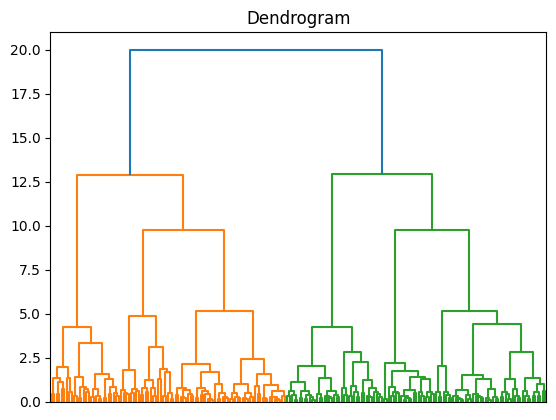

In [7]:
# Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'), no_labels=True)
plt.title("Dendrogram")
plt.show()

##### K-Means Clustering

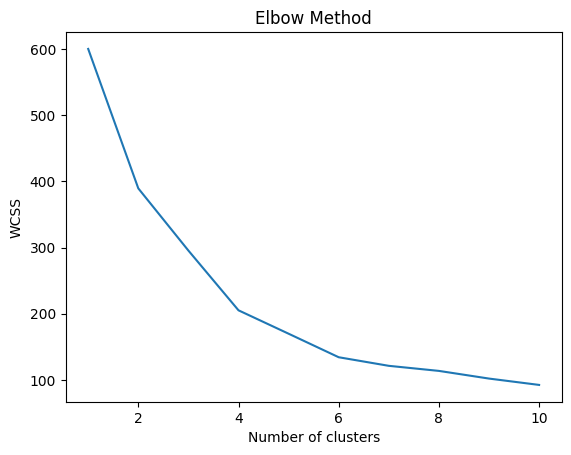

In [8]:
# Elbow Method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**Interpretation:** 
- WCSS drops sharply until k=4, then starts to flatten out.
- k=4 is likely optimal.

In [9]:
# K-means

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels

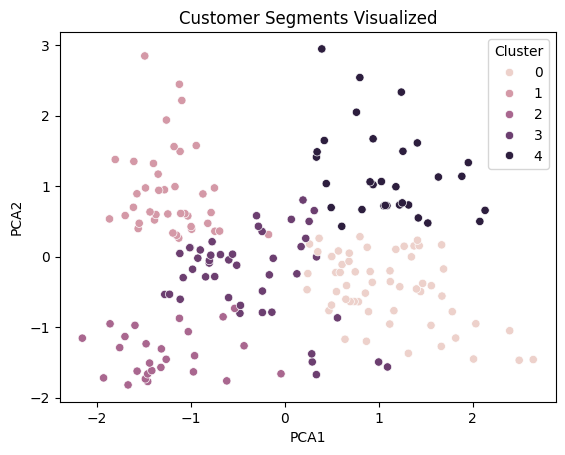

In [10]:
# PCA for 2D visualization

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df)
plt.title("Customer Segments Visualized")
plt.show()


**Interpretation:**
- There are at least 3-4 visibly distinct clusters, which means the segmentation model is finding real patterns.
- The tight cluster on the left might be young high-spenders (Cluster 2), while the looser one on the right could be older low-spenders (Cluster 4).

In [11]:
# Analysing Cluster profiles

df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


**Cluster-by-Cluster Interpretation:**

*Cluster 0:*
    - Age: 55.3 (older customers)
    - Income: $47.6k (moderate income)
    - Spending Score: 41.7 (average spenders)

- Likely mature customers with stable but average spending. 
- Target with loyalty rewards or premium services.

*Cluster 1:*
    - Age: 32.9 (middle-aged)
    - Income: $86.1k (high income)
    - Spending Score: 81.5 (high spenders)

- These are your ideal customers: young professionals with high income and high spending. 
- Focus your marketing and upsell strategies here.

*Cluster 2:*
    - Age: 25.8 (youngest group)
    - Income: $26.1k (low income)
    - Spending Score: 74.8 (high spenders)

- Young, budget-conscious customers who still spend a lot: likely impulsive or trend-driven. 
- Use influencer marketing, student discounts, or social media ads.

*Cluster 3:*
    - Age: 26.7 (young)
    - Income: $54.3k (moderate)
    - Spending Score: 40.9 (average)

- Could be occasional shoppers.
- target them with seasonal sales or reminders to increase engagement.

*Cluster 4:*
    - Age: 44.4 (older)
    - Income: $89.8k (highest income)
    - Spending Score: 18.5 (very low spending)

- Wealthy but conservative spenders (maybe skeptical or prefer luxury elsewhere). 
- Try building trust or offering exclusive, high-end deals.

**Summary**

| Cluster | Label                          | Marketing Focus                    |
| ------- | ------------------------------ | ---------------------------------- |
| 0       | Mature, average spenders       | Loyalty programs, customer service |
| 1       | Rich & high spenders           | Premium offers, VIP benefits       |
| 2       | Young, low-income, spendy      | Flash sales, social campaigns      |
| 3       | Young, moderate, average spend | Engagement through convenience     |
| 4       | Wealthy but frugal             | Trust-building, exclusive branding |
